# Loan eligilbilty prediction using machine learning
## Name : Dur-e-yashfeen
## Email : dureyashfeenprof@outlook.com
## Date : 2-sep-2024

## About Dataset
 >- **`Description`**\
> The Data Set was downloaded from Kaggle, from the following [link](https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset/data)

 >- Problem Statement:\
Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer's segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [ ]:
pip install scikit-learn

1. Importing libraries


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

2. load CSV


In [ ]:
df = pd.read_csv('loan-train.csv')

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


3. Basic Information

In [ ]:
df.shape

(614, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
pd.crosstab(df['Credit_History'],df['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<Axes: >

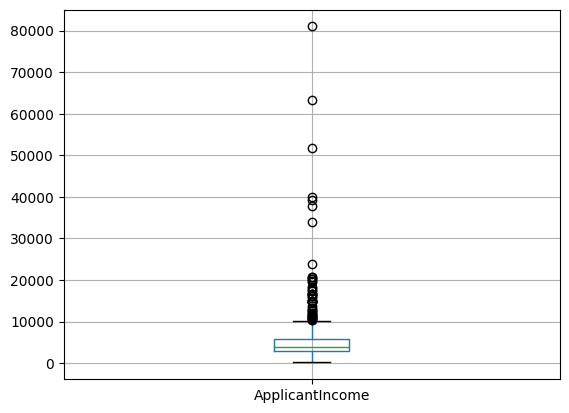

In [ ]:
df.boxplot(column='ApplicantIncome')

<Axes: >

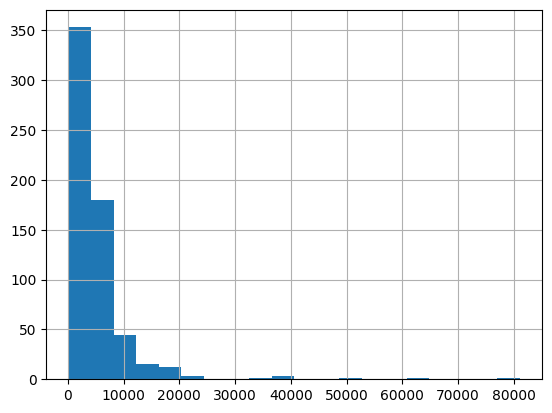

In [ ]:
df['ApplicantIncome'].hist(bins=20)

<Axes: >

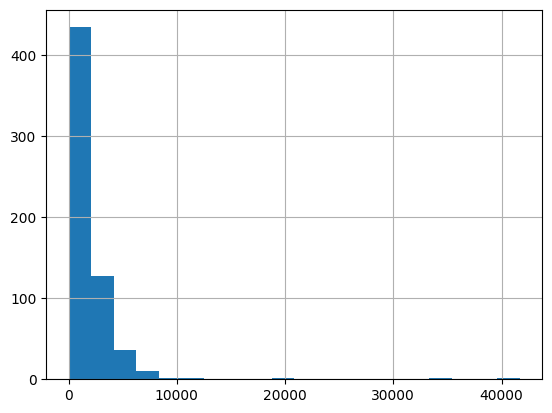

In [ ]:
df['CoapplicantIncome'].hist(bins=20)

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

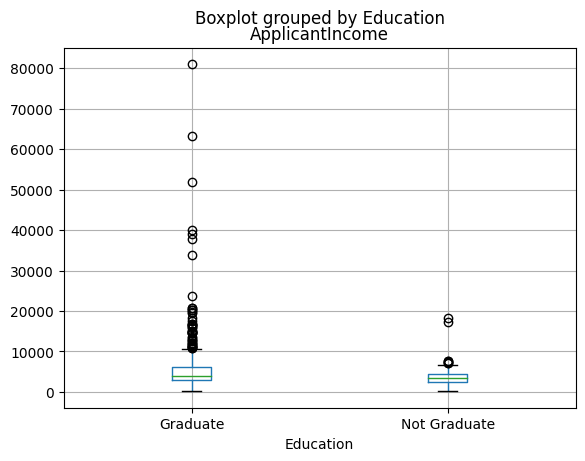

In [ ]:
df.boxplot( column='ApplicantIncome', by= 'Education')

<Axes: >

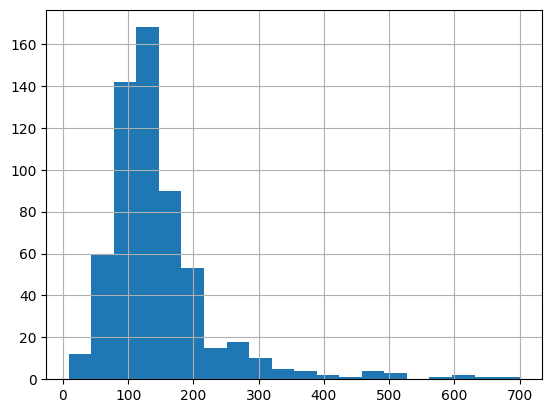

In [ ]:
df['LoanAmount'].hist(bins=20)

4. finding missing values

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [ ]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [ ]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [ ]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [ ]:
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())

In [ ]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [ ]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


<Axes: >

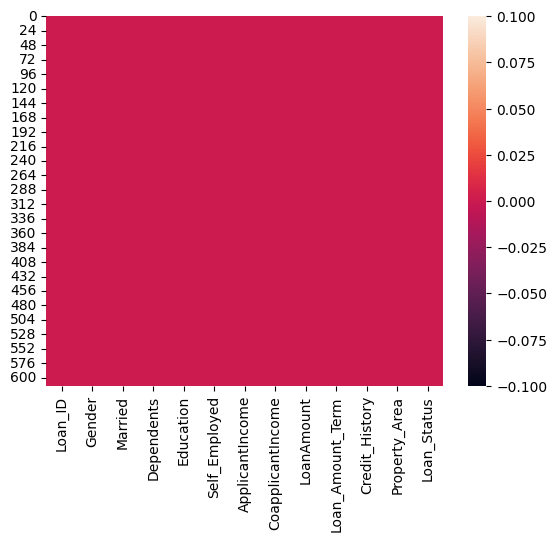

In [ ]:
sns.heatmap(df.isnull())

>- There is not mssing value left on the col of  data frame

In [ ]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['Loan_Status']= np.log(df['LoanAmount'])


<Axes: >

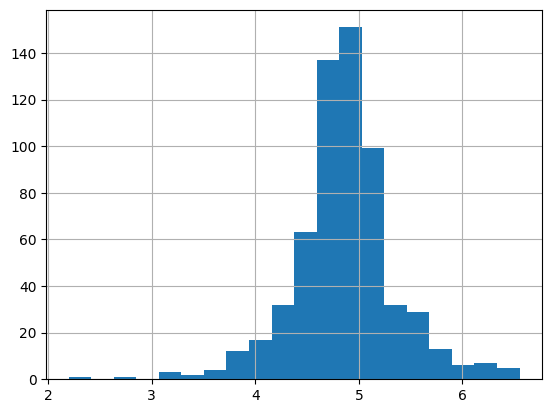

In [ ]:
df['Loan_Status'].hist(bins=20)

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,4.986426,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,4.852030,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,4.189655,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,4.787492,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,4.948760,6000.0


In [ ]:
import numpy as np

# Assuming you want to select columns 1 to 4, 9 to 10 and 12 to 13
x = df.iloc[:, np.r_[1:5, 9:11, 12:14]].values  # Updated column indices
y = df.iloc[:, 12].values

In [ ]:
x

array([['Male', 'No', '0', ..., 1.0, 4.986425672954842, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [ ]:
y

array([4.98642567, 4.85203026, 4.18965474, 4.78749174, 4.94875989,
       5.58724866, 4.55387689, 5.06259503, 5.12396398, 5.85507192,
       4.24849524, 4.69134788, 5.29831737, 4.73619845, 2.83321334,
       4.82831374, 4.60517019, 4.33073334, 4.89034913, 4.74493213,
       4.6443909 , 5.75257264, 4.75359019, 4.71849887, 5.01727984,
       5.25227343, 4.80402104, 4.70048037, 3.55534806, 4.78749174,
       5.30330491, 4.30406509, 4.66343909, 4.73619845, 5.768321  ,
       4.98642567, 4.60517019, 4.9698133 , 5.21493576, 4.70048037,
       4.38202663, 3.8501476 , 4.31748811, 4.8978398 , 4.56434819,
       4.47733681, 3.78418963, 4.9698133 , 4.78749174, 4.9698133 ,
       4.60517019, 4.78749174, 4.71849887, 4.8978398 , 5.65599181,
       4.57471098, 4.56434819, 4.90527478, 5.19295685, 4.9698133 ,
       4.78749174, 4.59511985, 5.10594547, 4.98642567, 4.75359019,
       5.55295958, 4.83628191, 5.74300319, 4.82831374, 4.91265489,
       5.14749448, 4.57471098, 4.39444915, 4.55387689, 5.23110

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
print(x_train)

[['Male' 'Yes' '0' ... 1.0 4.875197323201151 5858.0]
 ['Male' 'No' '1' ... 1.0 5.278114659230517 11250.0]
 ['Male' 'Yes' '0' ... 0.0 5.003946305945459 5681.0]
 ...
 ['Male' 'Yes' '3+' ... 1.0 5.298317366548036 8334.0]
 ['Male' 'Yes' '0' ... 1.0 5.075173815233827 6033.0]
 ['Female' 'Yes' '0' ... 1.0 5.204006687076795 6486.0]]


In [ ]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder_x = LabelEncoder()

In [ ]:
for i in range(0,5):
    x_train[:,i] = LabelEncoder_x.fit_transform(x_train[:,i])

In [ ]:
x_train[:, 7] = LabelEncoder_x.fit_transform(x_train[:, 7])


In [ ]:
x_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object)

In [ ]:
LabelEncoder_y = LabelEncoder()
y_train = LabelEncoder_y.fit_transform(y_train)

In [ ]:
y_train

array([ 80, 131,  98,  65,  99, 119, 126,  13, 117,  45,   0, 116,  45,
        60,  61,  25,  25,  73, 141,  49,  70, 161, 176,  86, 101,  59,
        52, 119,  85,  81,  70,   8,  75, 110, 105,  14,  69,  69,  49,
        96,  96,  46,  44,  96,  23, 139, 126,  82,  93,   6,  87, 100,
        59, 103,  71, 179,  26, 104,  99,   5, 116,  51, 165,  91,  64,
        23, 154,  74, 121,  69, 104,  72, 124,   2, 183,  85,  96,  82,
       120,   7,   9, 180,  79, 115,   6, 108,  84, 151, 177,  26, 101,
        16,  32,  65, 101,  59,  74,  96,  41, 152, 112, 172, 176,  59,
       171,  69,  85, 140,  62, 124,  87,  39,  66, 106, 143,  51, 152,
        84, 126,  62,  87, 181, 102,  69, 100,  12,  53,  62, 159, 133,
        16,  93, 151,  82,  79,  99,  80,  45,  69,  96, 104,  81,  77,
        54,  17,  60,  92,  78, 123, 136, 122,  45, 109, 106, 130,  12,
        93, 173,  59,  40,  69,  69,  74,  87,  76, 126,  31,  90, 149,
        15, 104,  77, 156, 115, 157, 160,  96, 106,  65, 135,  9

In [ ]:
for i in range(0,5):
    x_test[:,i] = LabelEncoder_x.fit_transform(x_test[:,i])

In [ ]:
x_test[:, 7] = LabelEncoder_x.fit_transform(x_test[:, 7])

In [ ]:
LabelEncoder_y = LabelEncoder()
y_test = LabelEncoder_y.fit_transform(y_test)

In [ ]:
x_test

array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313, 85],
       [0, 0, 0, 0, 5, 1.0, 4.718498871295094, 28],
       [1, 1, 0, 0, 5, 1.0, 5.780743515792329, 104],
       [1, 1, 0, 0, 5, 1.0, 4.700480365792417, 80],
       [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 22],
       [1, 1, 0, 1, 3, 0.0, 5.10594547390058, 70],
       [1, 1, 3, 0, 3, 1.0, 5.056245805348308, 77],
       [1, 0, 0, 0, 5, 1.0, 6.003887067106539, 114],
       [1, 0, 0, 0, 5, 0.0, 4.820281565605037, 53],
       [1, 1, 0, 0, 5, 1.0, 4.852030263919617, 55],
       [0, 0, 0, 0, 5, 1.0, 4.430816798843313, 4],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 2],
       [0, 0, 0, 0, 5, 1.0, 5.634789603169249, 96],
       [1, 1, 2, 0, 5, 1.0, 5.4638318050256105, 97],
       [1, 1, 0, 0, 5, 1.0, 4.564348191467836, 117],
       [1, 1, 1, 0, 5, 1.0, 4.204692619390966, 22],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 32],
       [1, 0, 0, 1, 5, 1.0, 4.882801922586371, 25],
       [0, 0, 0, 0, 5, 1.0, 4.532599493153256, 1],
       [1, 1

In [ ]:
y_test

array([10, 24, 71, 22, 16, 48, 45, 72, 30, 33, 10, 14, 68, 65, 15,  3, 58,
       35, 13, 55, 28, 42, 21, 48,  2, 66, 57, 57, 33, 18, 64,  1, 12, 54,
       44, 53, 50, 32, 33, 21,  8, 29,  0, 46,  7, 57, 27, 26, 33, 41,  6,
       34, 20, 44, 24, 67, 14, 36, 49, 28, 40, 63, 26,  7, 36, 69, 47, 39,
       56, 15,  3, 34, 45, 40, 43, 30, 12, 70, 24, 27, 25, 74, 59, 57,  5,
       23, 22, 60, 25, 19, 17,  6, 50, 54,  5, 32, 51, 43,  9, 57, 62, 17,
       28, 28, 33, 31, 19, 11, 14,  9, 60, 38, 25,  4, 61, 12, 10, 37, 52,
       34, 73,  4, 15])

In [ ]:
from sklearn.preprocessing import StandardScaler
ss  = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTclassifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = DTclassifier.predict(x_test)
y_pred

array([ 32,  60, 173,  57,  43, 116, 109, 176,  72,  77,  32,  42, 165,
       151,  42,  19, 132,  82,  41, 127,  68,  94,  55, 116,  12, 157,
       131, 131,  77,  51, 149,   6,  38, 127,  98, 125, 121,  75,  77,
        55,  30,  72,   0, 110,  29, 131,  64,  63,  77,  91,  25,  80,
        54,  98,  60, 159,  42,  83, 119,  68,  88, 141,  63,  27,  83,
       170, 114,  86, 128,  42,  19,  80, 109,  88,  96,  72,  37, 172,
        60,  64,  61, 181, 134, 131,  23,  58,  57, 141,  61,  51,  46,
        25, 121, 127,  23,  75, 122,  96,  31, 131, 147,  46,  68,  68,
        77,  74,  51,  35,  42,  31, 139,  85,  61,  19, 139,  38,  32,
        84, 123,  80, 180,  20,  42])

In [ ]:
from sklearn import metrics # Correct the import statement to use 'metrics'
print('The accuracy of decision tree is ', metrics.accuracy_score(y_test,y_pred))

The accuracy of decision tree is  0.008130081300813009


In [ ]:
from sklearn.naive_bayes import GaussianNB
NBclassifier = GaussianNB()
NBclassifier.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred = NBclassifier.predict(x_test)
y_pred

array([ 32,  60, 164,  59,  44, 108, 108, 176,  74,  76,  32,  41, 151,
       151,  43,  18, 126,  82,  41, 126,  65,  96,  55, 116,  12, 157,
       129, 129,  76,  49, 151,  15,  33, 126,  99, 108, 124,  74,  76,
        54,  32,  74,   6, 109,  25, 129,  64,  64,  76,  89,  25,  79,
        54,  99,  60, 157,  41,  82, 118,  69,  85, 141,  64,  23,  82,
       169, 109,  85, 129,  43,  18,  81, 109,  89,  96,  74,  39, 176,
        60,  64,  60, 181, 141, 129,  23,  60,  59, 138,  60,  49,  47,
        25, 124, 126,  23,  74, 124,  96,  32, 129, 141,  47,  69,  69,
        76,  74,  49,  33,  43,  32, 138,  85,  60,  23, 126,  32,  32,
        85, 124,  79, 176,  23,  43])

In [ ]:
print('The accuracy of naive_bayes is ', metrics.accuracy_score(y_test,y_pred))

The accuracy of naive_bayes is  0.0


In [ ]:
test_data = pd.read_csv('loan-test.csv')

In [ ]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
test_data.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [ ]:
test_data['Gender'].fillna(test_data['Gender'].mode()[0] , inplace=True)
test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0] , inplace=True)
test_data['Dependents'].fillna(test_data['Dependents'].mode()[0] , inplace=True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0] , inplace=True)
test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0] , inplace=True)
test_data['LoanAmount'].fillna(test_data['LoanAmount'].mode()[0] , inplace=True)


In [ ]:
test_data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


<Axes: >

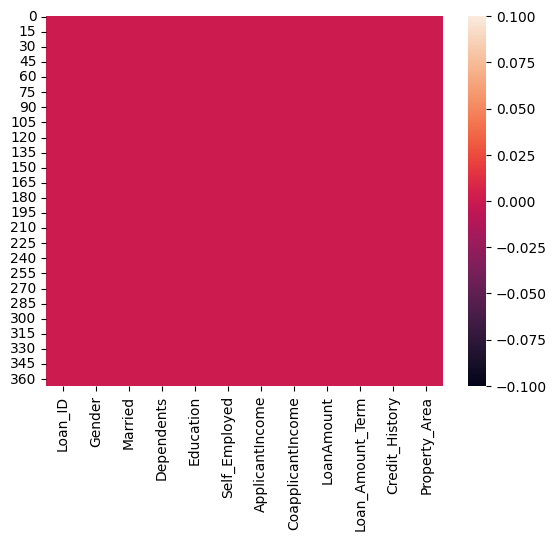

In [ ]:
sns.heatmap(test_data.isnull())

<Axes: >

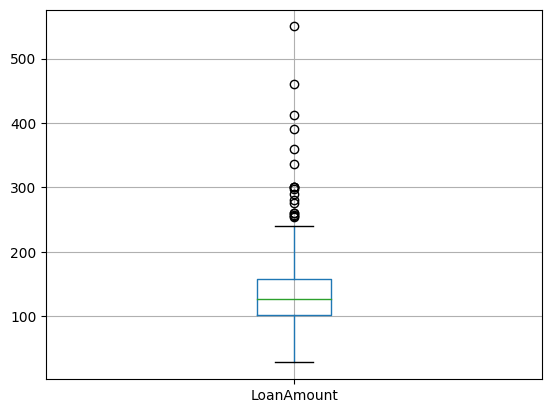

In [ ]:
test_data.boxplot( column='LoanAmount')

<Axes: >

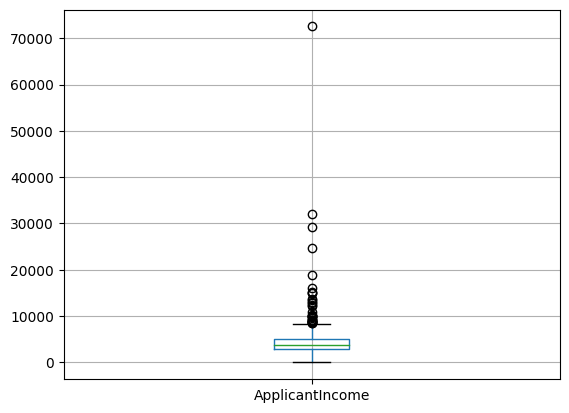

In [ ]:
test_data.boxplot( column='ApplicantIncome')

In [ ]:
test_data.LoanAmount = test_data.LoanAmount.fillna(test_data.LoanAmount.mean())

In [ ]:
test_data['Property_Area'] = np.log(test_data['LoanAmount'])


In [ ]:
test_data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
# Assuming 'test_data' has less than 14 columns, adjust the ranges accordingly
test = test_data.iloc[:,np.r_[1:5,9:11,12:len(test_data.columns)]].values
# The last slice now dynamically adjusts to the number of columns in your DataFrame.

In [ ]:
for i in range(0,5):
    test[:,i] = LabelEncoder_x.fit_transform(test[:,i])

In [ ]:
test

array([[1, 1, 0, 0, 10, 1.0],
       [1, 1, 1, 0, 10, 1.0],
       [1, 1, 2, 0, 10, 1.0],
       ...,
       [1, 0, 0, 0, 10, 1.0],
       [1, 1, 0, 0, 10, 1.0],
       [1, 0, 0, 0, 6, 1.0]], dtype=object)

In [ ]:
test = ss.fit_transform(test)

In [ ]:

# Assuming 'test_data' has less than 14 columns, adjust the ranges accordingly
test = test_data.iloc[:,np.r_[1:5,9:11,12:len(test_data.columns)]].values
# The last slice now dynamically adjusts to the number of columns in your DataFrame.

# Apply LabelEncoder to the categorical features (adjust indices as needed)
for i in range(0,5):
    test[:,i] = LabelEncoder_x.fit_transform(test[:,i])

# Before scaling, ensure 'test' has the same number of features as the training data
# Add dummy features if necessary
if test.shape[1] < 8:
    num_dummy_features = 8 - test.shape[1]
    dummy_features = np.zeros((test.shape[0], num_dummy_features))
    test = np.hstack((test, dummy_features))

# Now apply StandardScaler
test = ss.fit_transform(test)

# Predict using the model
pred = NBclassifier.predict(test)

In [ ]:
pred

array([79, 79, 79, 79, 79, 79, 81, 79, 77, 79, 79, 79, 77, 79, 81, 79, 79,
       79, 79, 77, 79, 81, 79, 81, 79, 79, 79, 79, 79, 77, 81, 79, 79, 79,
       79, 79, 77, 79, 79, 79, 79, 81, 79, 79, 81, 79, 79, 79, 79, 79, 79,
       79, 79, 77, 79, 79, 81, 77, 81, 77, 79, 79, 81, 81, 79, 79, 79, 79,
       79, 79, 81, 79, 77, 79, 79, 79, 79, 79, 79, 81, 79, 79, 81, 79, 81,
       77, 79, 79, 79, 81, 79, 79, 79, 79, 79, 81, 79, 79, 79, 79, 79, 81,
       79, 77, 79, 81, 79, 79, 79, 79, 81, 79, 81, 81, 79, 79, 81, 79, 81,
       79, 79, 79, 79, 79, 81, 79, 79, 79, 77, 79, 79, 79, 79, 81, 77, 79,
       79, 79, 79, 81, 79, 77, 79, 79, 77, 81, 79, 79, 79, 79, 79, 79, 79,
       79, 79, 77, 79, 77, 79, 79, 79, 79, 79, 81, 77, 79, 79, 79, 81, 81,
       81, 79, 79, 81, 79, 79, 79, 81, 79, 79, 79, 79, 79, 81, 79, 79, 79,
       79, 79, 79, 81, 79, 79, 79, 79, 79, 79, 79, 79, 79, 77, 79, 79, 81,
       81, 79, 79, 79, 81, 79, 81, 79, 79, 79, 79, 77, 77, 79, 79, 79, 79,
       79, 77, 81, 81, 81